In [1]:
import requests 
import pandas as pd
import numpy as np
import sys; sys.path
import datetime
import pandas as pd
import numpy as np 
from datetime import datetime
from datetime import datetime
from tqdm import tqdm
import random
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler

from bitcoin_deep_learning.call_api import ApiCall
from bitcoin_deep_learning.model import LinearRegressionBaselineModel, RnnDlModel,RandomForestReg, DummyModel, RnnDlModel_test
from bitcoin_deep_learning.trainer import cv_train, read_result
from bitcoin_deep_learning.cross_val import cross_val, get_cross_XY, cross_val_trade
from bitcoin_deep_learning.metrics import *
api = ApiCall()

%load_ext autoreload
%autoreload 2


In [ ]:
scaler = MinMaxScaler()
train_df= ApiCall().read_local()
for i in range(1,len(list(train_df.columns))-1):
    train_df[list(train_df.columns)[i]] = scaler.fit_transform(np.array(train_df[train_df.columns[1]]).reshape(-1, 1))
train_df

In [ ]:
model = RandomForestReg()
cv_train(model,train_df)
read_result().sort_values(by="date")

In [ ]:
"yolo"

In [ ]:
for n_estimators in [100,500,700,1000,1500,3000]:
    for warm_start in  [True,False]:
        for bootstrap in [True,False]:
            for criterion in ["squared_error", "absolute_error", "poisson"]:
                for min_samples_leaf in [1,5,10,20]:
                    model = RandomForestReg(warm_start=warm_start,
                                            n_estimators=n_estimators,
                                           bootstrap=bootstrap,
                                           criterion=criterion,
                                           min_samples_leaf=min_samples_leaf)

                    cv_train(model,train_df)

In [ ]:
X0 = [[i+5,-2*i]for i in range(1001)]
X1 = np.sin(np.arange(1001))

In [ ]:
df = pd.DataFrame(X0)
df["date"] = X1
df

In [ ]:
model = LinearRegressionBaselineModel()
#model = RnnDlModel(epochs=10,patience=2)
past_reality, reality,reality_diff, prediction_diff = cross_val_trade(model,df)

In [ ]:
past_reality[0]

In [ ]:
plt.plot(reality[0])

In [ ]:
plt.plot(prediction_diff[0],c="r")
plt.plot(reality_diff[0])

In [ ]:
model = LinearRegressionBaselineModel()
#model = RnnDlModel(epochs=10,patience=2)
past_reality, reality,reality_diff, prediction_diff = cross_val_trade(model,df)
plt.plot(prediction_diff[0],c="r")
plt.plot(reality_diff[0])

In [ ]:
df

In [ ]:
X_train_list, Y_train_list, X_test_list,Y_test_list = get_cross_XY(df.drop(columns="date"),data=None)

In [ ]:
X_train, Y_train, X_test,Y_test = X_train_list[0], Y_train_list[0], X_test_list[0],Y_test_list[0]

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
#X_train_scaled =  scaler.fit_transform(X_train[:,-1,:])
#X_test_scaled = scaler.transform(X_test[:,-1,:])
X_train_scaled =  (X_train[:,-1,:])
X_test_scaled = (X_test[:,-1,:])
X_train_scaled

In [ ]:
from sklearn.linear_model import ElasticNet
model = ElasticNet()
model.fit(X_train_scaled,Y_train)
Y_pred = model.predict(X_test_scaled)
plt.plot(Y_pred)
plt.plot(Y_test)

In [ ]:
Y_train

In [ ]:
X_train[:,-1,:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
scaler.fit(X_train[:,-1,:])

In [ ]:
X_train[:,-1,:]

In [ ]:
model = LinearRegressionBaselineModel(alpha=0.1,l1_ratio=0.001)
df = ApiCall().read_local()
X_train_list, Y_train_list, X_test_list,Y_test_list = get_cross_XY(df,data=None)



In [ ]:
cross_val_trade(model,df)

In [ ]:
past_reality, reality,reality_diff, prediction_diff = cross_val_trade(model,df)

In [ ]:
ct = 0
preds = []
computed_reality = []
for past_prices, diffs in zip(past_reality,prediction_diff):
    preds.append(past_prices * diffs+ past_prices)
preds  

In [ ]:
df = api.read_local()
scaler = MinMaxScaler()
#df  =scaler.fit_transform(df.drop(columns="date"))

In [ ]:
df[df.columns[1]].shape

In [ ]:
df

In [ ]:

df = api.read_local()
scaler = MinMaxScaler()
for i in range(1,len(list(df.columns))):
    df[list(df.columns)[i]] = scaler.fit_transform(np.array(df[df.columns[1]]).reshape(-1, 1))

model = LinearRegressionBaselineModel(alpha=0.5,l1_ratio=0.001)
#model = RnnDlModel(epochs=10,patience=2)
past_reality, reality,reality_diff, prediction_diff = cross_val_trade(model,df)
for i in range(10):
    plt.plot(prediction_diff[i],c="r")
    plt.plot(reality_diff[i])
    plt.show()


In [ ]:
df

In [ ]:
fold_score, score= train(model,df)
print(fold_score,score)

In [ ]:
for counter in range(20):
    alpha = 0.015 * random.random()
    l1 = random.random()*0.01
    # Instanciate model
    regression_model = LinearRegressionBaselineModel(alpha = alpha, l1_ratio = l1)
    # Train and Fit data using the crossval
    val_score, score = train(regression_model,df);
    print(val_score,score)
    past_reality, reality,reality_diff, prediction_diff = cross_val_trade(model,df)
    for i in range(len(reality)):
        plt.plot(prediction_diff[i],c="r")
        plt.plot(reality_diff[i])
        plt.show()

In [ ]:
from bitcoin_deep_learning.trainer import read_result
read_result().sort_values(by="date",ascending=False)

In [ ]:
df = api.read_local()
scaler = MinMaxScaler()
for i in range(1,len(list(df.columns))-1):
    df[list(df.columns)[i]] = scaler.fit_transform(np.array(df[df.columns[1]]).reshape(-1, 1))

model = LinearRegressionBaselineModel(alpha=0.5,l1_ratio=0.001)
#model = RnnDlModel(epochs=10,patience=2)
past_reality, reality,reality_diff, prediction_diff = cross_val_trade(model,df)
ALPHA = [0.001,0.005,0.01,0.1,5,1,10,100]
L1 = [0.0001,0.0005,0.001,0.005,0.001,0.005,0.01,0.1,0.5,1]
for alpha in ALPHA :
    for l1 in L1 : 
        # Instanciate model
        regression_model = LinearRegressionBaselineModel(alpha = alpha, l1_ratio = l1)
        # Train and Fit data using the crossval
        val_score, score = train(regression_model,df);
        print(val_score,score)
        past_reality, reality,reality_diff, prediction_diff = cross_val_trade(model,df)
        for i in range(len(reality)):
            plt.plot(prediction_diff[i],c="r")
            plt.plot(reality_diff[i])
            plt.show()

In [ ]:
read_result().sort_values(by="date",ascending=False).head(50)

In [ ]:
df = api.read_local()
scaler = MinMaxScaler()
for i in range(1,len(list(df.columns))):
    df[list(df.columns)[i]] = scaler.fit_transform(np.array(df[df.columns[1]]).reshape(-1, 1))

model = LinearRegressionBaselineModel(alpha=0.5,l1_ratio=0.001)
#model = RnnDlModel(epochs=10,patience=2)
past_reality, reality,reality_diff, prediction_diff = cross_val_trade(model,df)
ALPHA = [0.001,0.005,0.01,0.1,5,1,10,100]
L1 = [0.0001,0.0005,0.001,0.005,0.001,0.005,0.01,0.1,0.5,1]
for alpha in ALPHA :
    for l1 in L1 : 
        # Instanciate model
        regression_model = LinearRegressionBaselineModel(alpha = alpha, l1_ratio = l1)
        # Train and Fit data using the crossval
        val_score, score = train(regression_model,df);
        print(val_score,score)
        past_reality, reality,reality_diff, prediction_diff = cross_val_trade(model,df)
        for i in range(len(reality)):
            plt.plot(reality[i])
            plt.plot()

In [ ]:
x = np.eye(260,3,31)
x.reshape(260,)

In [ ]:
read_result().sort_values(by="mean_score",ascending=False).head(50)

In [ ]:
from sklearn.metrics import mean_absolute_error
def train(model,
          df,
          save:bool=True,
          precision:int=5
          ):
    reality,prediction = cross_val(model,df)
    fold_score = [round(mean_absolute_error(Y_true,Y_pred),precision)
                            for Y_true,Y_pred in zip(reality,prediction)]
    score =round(np.mean(np.array(fold_score)),precision)
    # Option to save results
    if save == True :
        file_path = os.path.join(ROOT_DIR,
                                        "cross_val_data",
                                        'test.csv')
        # Check if file is there and create it otherwise
        if not os.path.isfile(file_path):
            fieldnames = ["name",'fold_score',"mean_score","min_score","max_score",'hyperparams','date']
            pd.DataFrame(columns=fieldnames).to_csv(file_path,index=False)
        # Append a new line with current CV results
        with open(file_path , 'a', newline='') as csvfile:
            fieldnames = ["name",'fold_score',"mean_score","min_score","max_score",'hyperparams','date']
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

            writer.writerow({"name":model.name, "fold_score":fold_score,
                            "mean_score":score,"min_score":min(fold_score),
                            "max_score":max(fold_score),
                            "hyperparams":model.hyperparams,
                            'date':datetime.now().strftime("%d-%m %H:%M:%S")})
            print("Training done")
        return fold_score, score


In [ ]:
train_df = ApiCall().read_local()

In [ ]:
read_result(file="CV_trader.csv")

In [ ]:

model = LinearRegressionBaselineModel()
train(model,train_df)

In [ ]:
ROOT_DIR = "/Users/Zalo/code/AlexandreLaizet/bitcoin_deep_learning"


In [ ]:
file_path = os.path.join(ROOT_DIR,
                        "cross_val_data",
                        'CV_trader.csv')
fieldnames = ["name",'fold_score',"mean_score","min_score","max_score",'hyperparams','date',
             "roi_hodler", "sharpe_hodler", "roi_trader", "sharpe_trader","roi_whale", "sharpe_whale",
              "roi_hodler_whale",  "sharpe_hodler_whale", "roi_charles", 
                "sharpe_charles"]
pd.DataFrame(columns=fieldnames).to_csv(file_path,index=False)
read_result(file="CV_trader.csv")

In [ ]:
from bitcoin_deep_learning.metrics import iterate_cross_val_results
iterate_cross_val_results()

In [ ]:
roi_hodler, roi_trader, roi_whale, roi_hodler_whale, roi_charles, sharpe_hodler, sharpe_trader, sharpe_whale, sharpe_hodler_whale, sharpe_charles = iterate_cross_val_results()


In [ ]:
with open(file_path , 'a', newline='') as csvfile:
            #fieldnames = ["name",'fold_score',"mean_score","min_score","max_score",'hyperparams','date']
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

            writer.writerow({"name":model.name, "fold_score":fold_score,
                            "mean_score":score,"min_score":min(fold_score),
                            "max_score":max(fold_score),
                            "hyperparams":model.hyperparams,
                            'date':datetime.now().strftime("%d-%m %H:%M:%S"),
                            "roi_hodler":roi_hodler
                            "sharpe_hodler": sharpe_hodler
                            "roi_trader": roi_trader
                            "sharpe_trader": sharpe_trader
                            "roi_whale": roi_whale
                            "sharpe_whale": sharpe_whale
                            "roi_hodler_whale": roi_hodler_whale
                            "sharpe_hodler_whale": sharpe_hodler_whale
                            "roi_charles": roi_charles
                            "sharpe_charles":sharpe_charles})
            print("Training done")

In [ ]:
train_df= ApiCall().read_local()

In [ ]:
scaler = MinMaxScaler()
train_df= ApiCall().read_local()
for i in range(1,len(list(train_df.columns))-1):
    train_df[list(train_df.columns)[i]] = scaler.fit_transform(np.array(train_df[train_df.columns[1]]).reshape(-1, 1))
train_df

In [ ]:
for warm_start in  [True,False]:
    for max_features in ["auto", "sqrt", "log2"]:
        for bootstrap in [True,False]:
            for criterion in ["squared_error", "absolute_error", "poisson"]:
                    for max_depht in [None,True]:
                        if max_depht :
                            max_depht = np.random.randint(1,1000)
                        print("oui")
                        min_samples_split = random.randint(2,100)
                        min_samples_leaf = random.randint(2,100)
                        model = RandomForestReg(warm_start=warm_start,
                                               max_features=max_features,
                                               bootstrap=bootstrap,
                                               criterion=criterion,
                                               max_depht=max_depht,
                                               min_samples_split=min_samples_split,
                                               min_samples_leaf=min_samples_leaf)

                        cv_train(model,train_df)

# Dummy model

In [ ]:
model = DummyModel()
cv_train(model,ApiCall().read_local(data="train"))
read_result().sort_values(by="date", ascending=False)

# Linear Model

In [ ]:
model = LinearRegressionBaselineModel()
cv_train(model,ApiCall().read_local(data="train"))
read_result().sort_values(by="date", ascending=False)

# Random Forest

In [ ]:
model = RandomForestReg()
cv_train(model,ApiCall().read_local(data="train"))
read_result().sort_values(by="date", ascending=False)

# RNN

In [ ]:
model = RnnDlModel_test(epochs=20, patience=5)
cv_train(model,ApiCall().read_local(data="train"))
read_result().sort_values(by="date", ascending=False)

# Test last 3 months

In [ ]:
from bitcoin_deep_learning.cross_val import cross_val_trade

In [ ]:
model = RnnDlModel_test(epochs=1, patience=1)
df = ApiCall().read_local(data="all")

plot_portolio_positions(model, df = df, cv=False,verbose=True)

In [ ]:
cv = False
past_realities, realities, realities_diff, prediction_diff = cross_val_trade(model, df=df, cv=cv, verbose=0)

In [ ]:
past_realities, realities, realities_diff, prediction_diff = cross_val_trade(LinearRegressionBaselineModel(), df=df, cv=cv, verbose=0)

In [ ]:
portfolio_positions_hodler = []
portfolio_positions_trader = []
portfolio_positions_whale = []
portfolio_positions_hodler_whale = []
portfolio_positions_charles = []
preds_arr = []
for past_prices, diffs in zip(past_realities,prediction_diff):
    preds_arr.append(past_prices * diffs+ past_prices )


for reality, prediction in zip(realities, preds_arr):
    y_true, y_pred = reality, prediction

    portfolio_positions_hodler.append(play_hodler_strategy(y_true, y_pred))
    portfolio_positions_trader.append(play_trader_strategy(y_true, y_pred))
    portfolio_positions_whale.append(play_whale_strategy(y_true, y_pred))
    portfolio_positions_hodler_whale.append(play_hodler_whale_strategy(y_true, y_pred))
    portfolio_positions_charles.append(play_charles_strategy(y_true, y_pred))

print(portfolio_positions_hodler, portfolio_positions_trader, portfolio_positions_whale, portfolio_positions_hodler_whale, portfolio_positions_charles)


In [ ]:
model = RandomForestReg()
df = ApiCall().read_local(data="all")
plot_portolio_positions(model=model, df = df, cv=False,verbose=True)

In [ ]:
model = LinearRegressionBaselineModel()
df = ApiCall().read_local(data="all")
Y_true_past, Y_true, Y_test, Y_pred = cross_val_trade(model,df,cv=False,verbose=True)
fig,axs = plt.subplots(2,1)
axs[0].plot(Y_test)

axs[0].plot(Y_pred, c= "r")
plt.show
#axs[1].plot(Y_true)
axs[1].plot(Y_true_past + Y_true_past* Y_pred, c= "r")
axs[1].plot(Y_true_past + Y_true_past* Y_test, c= "b")


In [ ]:
np.max(Y_pred)

In [ ]:
index = 89
print(Y_true_past[index],Y_pred[index],Y_true_past[index] + Y_true_past[index]* Y_pred[index])

In [ ]:
!ls

In [2]:
y_diff_pred = pd.read_csv("../data_raw/y_diff_pred_2022_transformer.csv")

In [30]:
y_pred_pct = np.array(y_diff_pred["0"])
y_pred_pct

array([ 0.01029747, -0.02246985, -0.00866947, -0.01746654, -0.01582856,
       -0.03148372, -0.01724427, -0.01331859, -0.03787381, -0.01817312,
       -0.01129518, -0.01034392, -0.03167456, -0.01213262, -0.02390629,
       -0.00719598, -0.00893066, -0.01765893, -0.02162992, -0.07023374,
       -0.00679851, -0.04326502, -0.01757031, -0.02655068,  0.00292373,
       -0.03150483, -0.02683108, -0.00413243,  0.02497891, -0.01661627,
       -0.01127071, -0.00921201,  0.00876955, -0.00042083, -0.04611199,
        0.00852869, -0.02894871,  0.00283749,  0.02229579, -0.01744312,
       -0.02605362, -0.00701745,  0.00795828, -0.02593561,  0.00055334,
       -0.02473522,  0.03149997,  0.04318135,  0.0174355 , -0.11493674,
        0.00470428, -0.00145886, -0.09448648, -0.01999437,  0.011966  ,
       -0.03214531, -0.0019545 ,  0.02006546,  0.02329322, -0.00757358,
       -0.0080473 ,  0.01860012,  0.01083946,  0.03002646,  0.0049376 ,
        0.03462518,  0.00156122,  0.02823245])

In [4]:
y_diff_true = pd.read_csv("../data_raw/y_diff_true_2022.csv")
y_diff_true

,date,[%]_Bitcoin_growth_rate_on_Horizon=7
0,2022-01-01,-0.063618
1,2022-01-02,-0.073115
2,2022-01-03,-0.089166
3,2022-01-04,-0.037951
4,2022-01-05,-0.064654
...,...,...
63,2022-03-05,0.009345
64,2022-03-06,0.018275
65,2022-03-07,-0.136405
66,2022-03-08,-0.145170


In [54]:
train_df[-68:]["[+]_[T]_Bitcoin_Price"]

1430    47620.423811
1431    47344.843410
1432    46467.615795
1433    45926.761787
1434    43589.355683
            ...     
1493    39416.462688
1494    38423.618936
1495    38018.649505
1496    38726.302102
1497    41977.383462
Name: [+]_[T]_Bitcoin_Price, Length: 68, dtype: float64

In [97]:
train_df= ApiCall().read_local()
train_df[-74:]

,date,[AVG]_[NH]_mean_hash_rate,[+]_[NH]_Days_Till_Halving,[//]_[AV]_Stock-to-Flow_Ratio,[+]_[NH]_Circulating_Supply,[+]_[NH]_Issuance,[+]_[NH]_Number_of_Active_Addresses,[+]_[NH]_Mean_Block_Interval,[+]_[NH]_Number_of_Transactions,[+]_[NH]_Number_of_Addresses_with_a_Non-Zero_Balance,...,[//]_[AV]_Realized_Profits-to-Value_(RPV)_Ratio,fear_greed_value,[+]_[NH]_Number_of_Addresses_with_Balance_0.01 - 0.1,[+]_[NH]_Number_of_Addresses_with_Balance_0.1 - 1,[+]_[NH]_Number_of_Addresses_with_Balance_1 - 10,[+]_[NH]_Number_of_Addresses_with_Balance_10 - 100,[+]_[NH]_Number_of_Addresses_with_Balance_100 - 1k,[+]_[NH]_Number_of_Addresses_with_Balance_1k - 10k,[+]_[T]_Bitcoin_Price,[%]_Bitcoin_growth_rate_on_Horizon=7
1425,2021-12-27,1.788373e+20,853,107059.860269,18912825.00,925.00,995958,357,249400,39681460,...,0.001299,40,6046465,2481038,665473,131478,13908,2061,50610.956803,0.074238
1426,2021-12-28,1.613201e+20,852,107254.070254,18913662.50,837.50,1049113,410,265288,39697526,...,0.000723,41,6053261,2482678,665552,131319,13899,2063,47669.740372,-0.027008
1427,2021-12-29,1.749405e+20,851,107320.134879,18914568.75,906.25,1141226,457,275938,39626656,...,0.000719,27,6054614,2483936,665896,131474,13916,2047,46407.595490,-0.048243
1428,2021-12-30,1.440319e+20,850,107698.215171,18915312.50,743.75,978725,481,244902,39668496,...,0.001717,22,6071397,2487112,666508,131391,13891,2056,47188.320550,-0.075915
1429,2021-12-31,1.791817e+20,849,107833.853215,18916243.75,931.25,1109141,370,269391,39561128,...,0.001737,28,6060601,2481583,666879,131587,13911,2051,46328.943138,-0.097895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,2022-03-06,1.789926e+20,784,108870.777114,18976212.50,818.75,776309,543,206985,40386891,...,0.000430,22,6226429,2547136,674912,130412,13660,2171,38423.618936,0.018275
1495,2022-03-07,2.033926e+20,783,108875.720822,18977137.50,925.00,918501,458,255293,40390661,...,0.001009,23,6233503,2550289,675262,130388,13648,2171,38018.649505,-0.136405
1496,2022-03-08,2.023772e+20,782,108943.145857,18978062.50,925.00,956336,358,255623,40368448,...,0.000851,21,6234382,2553756,675727,130458,13650,2178,38726.302102,-0.145170
1497,2022-03-09,1.888209e+20,781,108974.601445,18978925.00,862.50,962981,396,272667,40437626,...,0.002457,22,6242298,2556473,676454,130499,13664,2179,41977.383462,-0.046669


In [98]:
#test
train_df["[+]_[T]_Bitcoin_Price"][-74:-73] + train_df["[+]_[T]_Bitcoin_Price"][-74:-73] * y_pred_pct[0]

1425    51132.121612
Name: [+]_[T]_Bitcoin_Price, dtype: float64

In [99]:
past_price = np.array(train_df[-74:-6]["[+]_[T]_Bitcoin_Price"])
past_price

array([50610.95680294, 47669.74037208, 46407.59548964, 47188.32055009,
       46328.94313809, 47620.42381093, 47344.84340974, 46467.61579525,
       45926.76178657, 43589.35568307, 43154.45522485, 41564.23901044,
       41744.05783199, 41910.51226779, 41820.01786922, 42721.69548372,
       43935.64398491, 42596.12337644, 43101.33599626, 43198.86986181,
       43122.78741443, 42235.1848487 , 42372.5532734 , 41731.94792084,
       40706.93154832, 36440.2657686 , 35036.9447362 , 36254.87985724,
       36656.19382217, 36946.23828322, 36851.36987997, 37148.32227909,
       37789.47882002, 38137.47269687, 37936.32877744, 38455.68966346,
       38784.50229871, 36924.10239442, 37018.58700268, 41516.07281916,
       41421.47643291, 42411.10429027, 43921.96437825, 44110.31669061,
       44347.12092966, 43548.07188871, 42407.68766215, 42198.7514316 ,
       42242.10014713, 42601.71507212, 44600.78417382, 43980.51455924,
       40548.83984707, 40031.59053806, 40127.36921663, 38460.39121722,
      

In [100]:
past_realities, prediction_diff = past_price, y_pred_pct
preds_arr = []
for past_prices, diffs in zip(past_realities,prediction_diff):
    preds_arr.append(past_prices * diffs+ past_prices )

In [101]:
preds_arr

[51132.12161228986,
 46598.60855171709,
 46005.26641840371,
 46364.10386166697,
 45595.62268189201,
 46121.155864250155,
 46528.41605218841,
 45848.73262573238,
 44187.340244896805,
 42797.20109152082,
 42667.01769108885,
 41134.301888817914,
 40421.83316754289,
 41402.02807417141,
 40820.25651969704,
 42414.2709747348,
 43543.269642666346,
 41843.92141546177,
 42169.05746056951,
 40164.851667643554,
 42829.61661378416,
 40407.87864705031,
 41628.05437689353,
 40623.93615889046,
 40825.947462464894,
 35292.22131752485,
 34096.86566902753,
 36105.059201962526,
 37571.82569856747,
 36332.3297602041,
 36436.028924356215,
 36806.11148847439,
 38120.87546842686,
 38121.423260758675,
 36187.00905040825,
 38783.66649238211,
 37661.740872812356,
 37028.87414356442,
 37843.945718624636,
 40791.902979044964,
 40342.296943246096,
 42113.486550089176,
 44271.50771284119,
 42966.288852273305,
 44371.65987065591,
 42470.9005322247,
 43743.528720905255,
 44020.95048673336,
 42978.612242004485,
 37705

In [102]:
past_realities

array([50610.95680294, 47669.74037208, 46407.59548964, 47188.32055009,
       46328.94313809, 47620.42381093, 47344.84340974, 46467.61579525,
       45926.76178657, 43589.35568307, 43154.45522485, 41564.23901044,
       41744.05783199, 41910.51226779, 41820.01786922, 42721.69548372,
       43935.64398491, 42596.12337644, 43101.33599626, 43198.86986181,
       43122.78741443, 42235.1848487 , 42372.5532734 , 41731.94792084,
       40706.93154832, 36440.2657686 , 35036.9447362 , 36254.87985724,
       36656.19382217, 36946.23828322, 36851.36987997, 37148.32227909,
       37789.47882002, 38137.47269687, 37936.32877744, 38455.68966346,
       38784.50229871, 36924.10239442, 37018.58700268, 41516.07281916,
       41421.47643291, 42411.10429027, 43921.96437825, 44110.31669061,
       44347.12092966, 43548.07188871, 42407.68766215, 42198.7514316 ,
       42242.10014713, 42601.71507212, 44600.78417382, 43980.51455924,
       40548.83984707, 40031.59053806, 40127.36921663, 38460.39121722,
      

In [103]:
np.array(train_df[-68:]["[+]_[T]_Bitcoin_Price"])

array([47344.84340974, 46467.61579525, 45926.76178657, 43589.35568307,
       43154.45522485, 41564.23901044, 41744.05783199, 41910.51226779,
       41820.01786922, 42721.69548372, 43935.64398491, 42596.12337644,
       43101.33599626, 43198.86986181, 43122.78741443, 42235.1848487 ,
       42372.5532734 , 41731.94792084, 40706.93154832, 36440.2657686 ,
       35036.9447362 , 36254.87985724, 36656.19382217, 36946.23828322,
       36851.36987997, 37148.32227909, 37789.47882002, 38137.47269687,
       37936.32877744, 38455.68966346, 38784.50229871, 36924.10239442,
       37018.58700268, 41516.07281916, 41421.47643291, 42411.10429027,
       43921.96437825, 44110.31669061, 44347.12092966, 43548.07188871,
       42407.68766215, 42198.7514316 , 42242.10014713, 42601.71507212,
       44600.78417382, 43980.51455924, 40548.83984707, 40031.59053806,
       40127.36921663, 38460.39121722, 37012.56063945, 38314.64973454,
       37311.62561222, 38305.92776288, 39216.70043785, 39048.12227488,
      

In [104]:
np.atleast_1d(np.array(preds_arr))

array([51132.12161229, 46598.60855172, 46005.2664184 , 46364.10386167,
       45595.62268189, 46121.15586425, 46528.41605219, 45848.73262573,
       44187.3402449 , 42797.20109152, 42667.01769109, 41134.30188882,
       40421.83316754, 41402.02807417, 40820.2565197 , 42414.27097473,
       43543.26964267, 41843.92141546, 42169.05746057, 40164.85166764,
       42829.61661378, 40407.87864705, 41628.05437689, 40623.93615889,
       40825.94746246, 35292.22131752, 34096.86566903, 36105.05920196,
       37571.82569857, 36332.3297602 , 36436.02892436, 36806.11148847,
       38120.87546843, 38121.42326076, 36187.00905041, 38783.66649238,
       37661.74087281, 37028.87414356, 37843.94571862, 40791.90297904,
       40342.29694325, 42113.48655009, 44271.50771284, 42966.28885227,
       44371.65987066, 42470.90053222, 43743.52872091, 44020.95048673,
       42978.612242  , 37705.21282332, 44810.59886676, 43916.35314577,
       36717.52270183, 39231.18422524, 40607.5333568 , 37224.06986498,
      

In [133]:
portfolio_positions_hodler = []
portfolio_positions_trader = []
portfolio_positions_whale = []
portfolio_positions_hodler_whale = []
portfolio_positions_charles = []

#y_true, y_pred = np.array(past_realities), np.atleast_1d(np.array(preds_arr))
y_true, y_pred = np.array(train_df[-68:]["[+]_[T]_Bitcoin_Price"]), np.atleast_1d(np.array(preds_arr))


portfolio_positions_hodler.append(play_hodler_strategy(y_true, y_pred))
portfolio_positions_trader.append(play_trader_strategy(y_true, y_pred))
portfolio_positions_whale.append(play_whale_strategy(y_true, y_pred))
portfolio_positions_hodler_whale.append(play_hodler_whale_strategy(y_true, y_pred))
portfolio_positions_charles.append(play_charles_strategy(y_true, y_pred))

In [267]:
compute_roi(play_hodler_strategy(y_true, y_pred))

-0.057134269078505384

In [268]:
compute_roi(play_trader_strategy(y_true, y_pred))

0.08508849865342971

In [265]:
compute_sharpe_ratio(play_hodler_strategy(y_true, y_pred))

-2.255031072130127

In [266]:
compute_sharpe_ratio(play_trader_strategy(y_true, y_pred))

3.093469100119063

In [134]:
portfolio_positions_hodler

[0     99.948529
 1     99.758749
 2     99.641740
 3     99.136062
 4     99.041975
         ...    
 62    96.930994
 63    94.238043
 64    94.238043
 65    94.238043
 66    94.238043
 Length: 67, dtype: float64]

In [135]:
portfolio_positions_trader

[0     100.000000
 1     100.000000
 2     100.000000
 3     100.000000
 4     100.000000
          ...    
 63    113.927368
 64    113.927368
 65    113.927368
 66    113.927368
 67    108.508850
 Length: 68, dtype: float64]

In [136]:
list(portfolio_positions_whale)

[0     100.000000
 1     100.000000
 2     100.000000
 3     100.000000
 4     100.000000
          ...    
 63    100.845434
 64    100.845434
 65    100.845434
 66    100.845434
 67    100.282262
 Length: 68, dtype: float64]

In [137]:
portfolio_positions_hodler_whale

[0     100.000000
 1     100.000000
 2     100.000000
 3     100.000000
 4     100.000000
          ...    
 63    100.845434
 64    100.845434
 65    100.845434
 66    100.845434
 67    100.282262
 Length: 68, dtype: float64]

In [138]:
portfolio_positions_charles

[0     100.000000
 1     100.000000
 2     100.000000
 3     100.000000
 4     100.000000
          ...    
 63    104.694418
 64    104.694418
 65    104.694418
 66    104.694418
 67    102.888670
 Length: 68, dtype: float64]

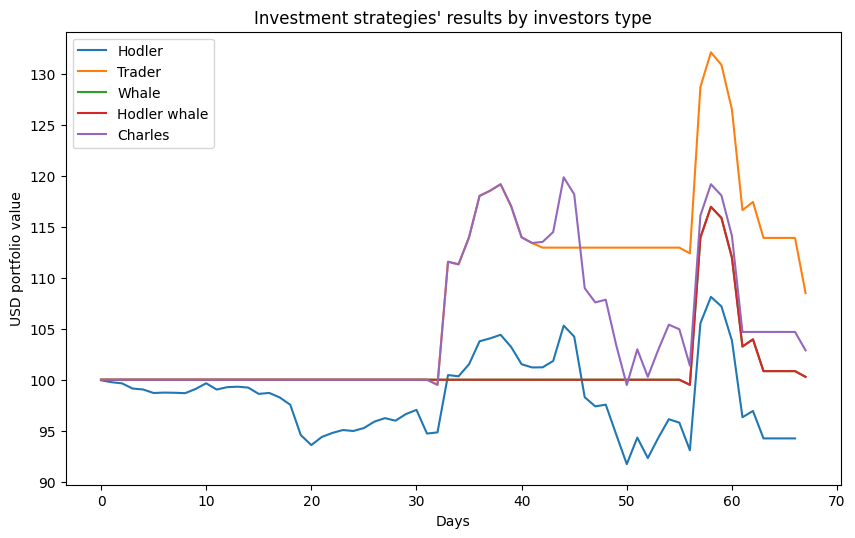

In [139]:
figure(figsize=(10, 6), dpi=100)
plt.plot(portfolio_positions_hodler[0], label="Hodler")
plt.plot(portfolio_positions_trader[0], label="Trader")
plt.plot(portfolio_positions_whale[0], label="Whale")
plt.plot(portfolio_positions_hodler_whale[0], label="Hodler whale")
plt.plot(portfolio_positions_charles[0], label="Charles")
plt.title("Investment strategies' results by investors type")
plt.xlabel("Days")
plt.ylabel("USD portfolio value")
plt.legend()

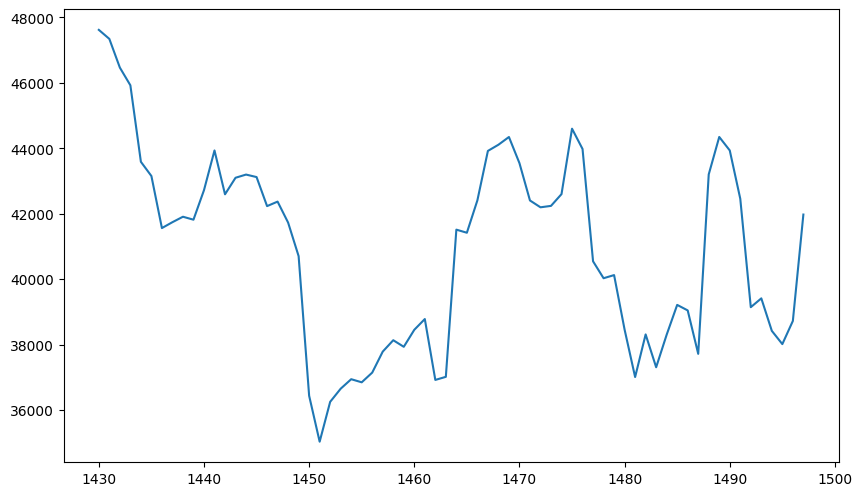

In [56]:
figure(figsize=(10, 6), dpi=100)

plt.plot(train_df[-68:]["[+]_[T]_Bitcoin_Price"])

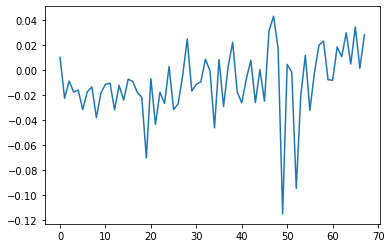

In [65]:
plt.plot(y_pred_pct)

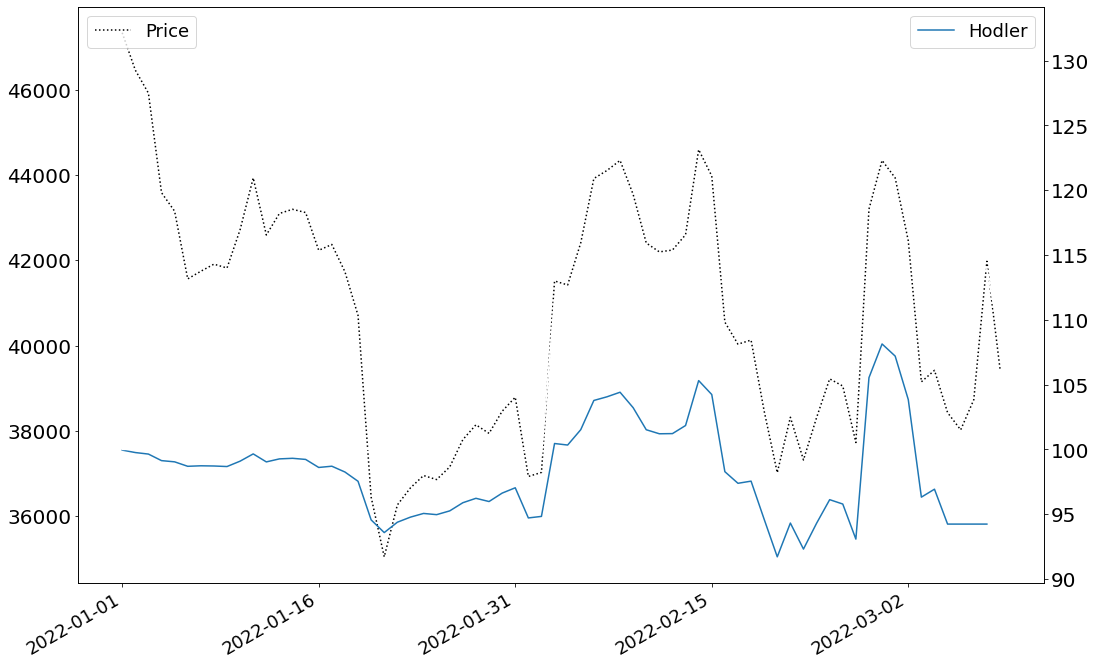

In [264]:
import matplotlib.ticker as ticker
fig, ax1 = plt.subplots()

ax1.plot(y_diff_true["date"], train_df[-68:]["[+]_[T]_Bitcoin_Price"], label="Price", linestyle="dotted",color="k")
ax1.tick_params(axis="x")

ax1.xaxis.set_major_locator(ticker.MultipleLocator(15))


plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=20, rotation=0)

plt.legend(fontsize=18, loc="upper left")


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.plot(portfolio_positions_hodler[0], label="Hodler")
#ax2.plot(portfolio_positions_trader[0], label="Trader")
ax2.plot(portfolio_positions_trader[0], color="w")
ax2.tick_params(axis='y')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

ax2.tick_params(axis='y', labelcolor='k', labelsize=20)


plt.legend(fontsize=18, loc="upper right")

fig.set_size_inches(18.5, 10.5)

fig.autofmt_xdate(rotation=30)
